
Fitted Lines:
	Bmag = -2.5*2.89 log(v) + 28.15
	Dispersion is 0.6530
	Reduced χ2 is 0.1476

	Rmag = -2.5*3.32 log(v) + 29.50
	Dispersion is 0.6385
	Reduced χ2 is 0.1411

	Imag = -2.5*3.49 log(v) + 29.93
	Dispersion is 0.6458
	Reduced χ2 is 0.1444


The I band slope of 3.49 is closest to the "expected" value of 4,
so this band best defines the TF relationship.
We might expect the I band to best match this, because that will show 
where mostly stellar mass is.

The R band has the tightest dispersion.


The percent distances uncertainties are 12% and 35% respectively.
Of the data that goes into this relation, I imagine that the angle of 
inclination contributes the highest uncertainty, especially for earlier 
type spiral galaxies. It just seems difficult to estimate with more 
precision than ten degrees or so.


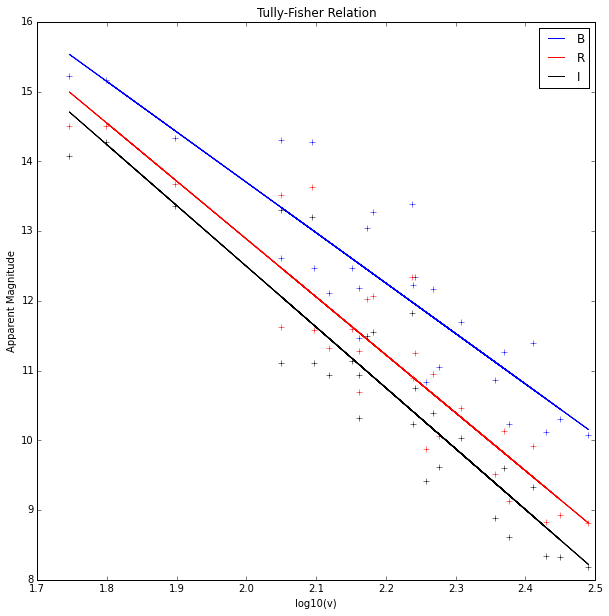

In [1]:
"""
         1         2         3         4         5         6         7      
1234567890123456789012345678901234567890123456789012345678901234567890123456

Cordell Newmiller
Prof. Lubin
PHY 267
Homework 4
Problem 2

See pencilwork for parts (a) and (b1)

"""
import numpy
from matplotlib import pyplot
%matplotlib inline

# import fields
# 0   ngc    catalog number
# 1   B      apparent B magnitude
# 2   R      apparent R magnitude
# 3   I      apparent I magnitude
# 4   inc    inclination (degrees, 0 = face on)
# 5   W20/2  observed rotation speed

data = numpy.genfromtxt('TF.rev.dat')

ngc = data[:,0]
mags = data[:,[1,2,3]]

#Bmag = data[:,1]
#Rmag = data[:,2]
#Imag = data[:,3]
inclination = data[:,4]
apparentrotation = data[:,5]

"""
Using these data, make a TF diagram of apparent magnitude versus true 
rotation speed in the B, R, and I bands. For each case, fit a line of 
the form 
    m = −2.5 a × log(Vmax) + b
"""

truerotation = apparentrotation / numpy.sin(inclination * numpy.pi/180)
logrot = numpy.log10(truerotation)

coeff = numpy.polyfit(logrot,mags,1)

a = coeff[0,:]/(-2.5)
b = coeff[1,:]
magfits = -2.5 * numpy.outer(logrot,a) + numpy.outer(numpy.ones(logrot.size),b)




# Part (b2)
figure1 = pyplot.figure(figsize=(10,10));
colors=['blue', 'red', 'black']
labels=['B','R','I']
for i in range(a.size):
    pyplot.plot(logrot,mags[:,i],'+',color=colors[i])
    pyplot.plot(logrot,magfits[:,i],color=colors[i],label=labels[i])

pyplot.title('Tully-Fisher Relation')
pyplot.xlabel('log10(v)')
pyplot.ylabel('Apparent Magnitude')
pyplot.legend()


reducedchisquares = (numpy.sum((mags - magfits)**2,0)/(mags.size-
                                                       coeff.shape[0]-1))
sigmas = (numpy.var(mags - magfits,0))**(1/2)

# Part (c)
print('\nFitted Lines:')
for i in range(a.size):
    print('\t%smag = -2.5*%2.2f log(v) + %2.2f' % (labels[i], a[i], b[i]))
    print('\tDispersion is %2.4f' % (sigmas[i]))
    print('\tReduced χ2 is %2.4f\n' % (reducedchisquares[i]))

expected = 4
closest = numpy.argmin(numpy.abs(expected - a))
bestfit = numpy.argmin(reducedchisquares)

print('\nThe %s band slope of %2.2f is closest to the \"expected\" value of %s,' 
      % (labels[closest],a[closest],expected))
print('so this band best defines the TF relationship.')
print('We might expect the I band to best match this, because that will show',
      '\nwhere mostly stellar mass is.')

print('\nThe %s band has the tightest dispersion.' % (labels[bestfit]))


# Part (d)
magerr=numpy.array([0.25,0.75])
# solve m-M=5log10(D/10) for D, differentiate to find dD, divide to find dD/D 
percentderr=100*magerr*numpy.log(10)/5  

print('\n\nThe percent distances uncertainties are %2.0f%% and %2.0f%% respectively.' 
      % (percentderr[0],percentderr[1]))
print('Of the data that goes into this relation, I imagine that the angle of',
      '\ninclination contributes the highest uncertainty, especially for earlier',
      '\ntype spiral galaxies. It just seems difficult to estimate with more',
      '\nprecision than ten degrees or so.')

# End of problem 2